### 시계열 분석
시간의 흐름에 따라 기록된 데이터를 바탕으로 미래의 변화에 대한 추세를 분석하는 방법이다. 시간을 고려하기 때문에 시간에 따라 데이터의 추세가 어떠한지 시간 외에 어떠한 외부요인이 데이터에 영향을 미치는지를 나누어 생각할 수 있어야 한다.

##### 1) 시계열 분해
시계열 자료를 추세(Trend), 계절성(Seasonality), 잔차(Residual)로 분해하는 기법이다.
- 시간요인 : 추세, 계절성
- 외부요인 : 잔차(불규칙요인)


시계열의 주기적 반복/계절성이 있는지에 따라 Additive 모형과 Multiplicative 모형 중 어떤 모형이 더 적합할지 판단한다.
- Additive : 추세와 계절성이 별개로 존재하는 경우
- Multiplicative : 추세에 따라 계절성이 있는 경우


<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*LdeXlKrgNkFUjOhnO4Zzaw.jpeg" width='65%' height='65%'>

###### 출처 및 참고 : [medium - sigmundojr](https://sigmundojr.medium.com/seasonality-in-python-additive-or-multiplicative-model-d4b9cf1f48a7)

In [1]:
import pandas as pd
import warnings

data = pd.read_csv('./data/arima_data.csv', names = ['day', 'price'])
data.head()

,day,price
0,2013-01-01,3794
1,2013-02-01,3863
2,2013-03-01,5190
3,2013-04-01,5783
4,2013-05-01,6298


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   day     60 non-null     object
 1   price   60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


데이터를 확인했을 때, day 값이 object 문자열이므로 datetime으로 변환해야 한다.

In [3]:
data['day'] = pd.to_datetime(data['day'],format="%Y-%m-%d")
data.set_index('day', inplace=True)
data.head(3)

,price
day,
2013-01-01,3794
2013-02-01,3863
2013-03-01,5190


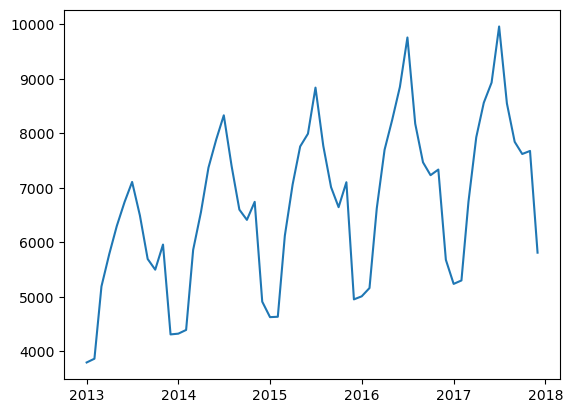

In [4]:
import matplotlib.pyplot as plt
plt.plot(data.index,data['price'])

원본 데이터를 시각화해보면, 추세에 따라 계절성이 존재하는 것을 볼 수 있다. 시간이 지날수록 변동이 커지므로 Multiplicative를 적용하여 시계열 분해를 할 수 있다.

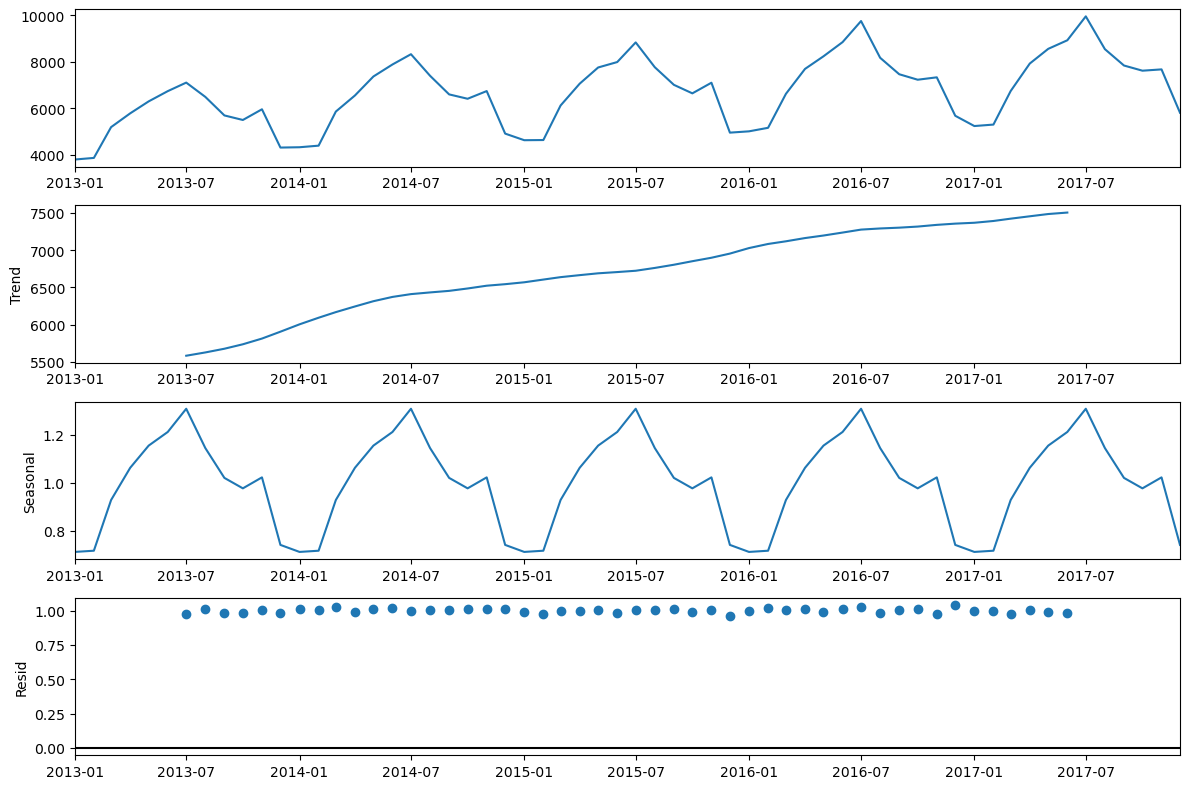

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts = data
result = seasonal_decompose(ts, model='multiplicative')
plt.rcParams['figure.figsize'] = [12, 8]
result.plot()
plt.show()

seasonal_decompose 함수로 시계열 분해한 결과 값을 보면, 해당 데이터는 Trend(추세)와 Seasonal(계절성)이 명확히 존재하며, 불규칙요인은 거의 없음을 알 수 있다.

##### 2) 정상성 변환
정상성(Stationary)이란 평균, 분산이 시간에 따라 일정한 성질을 가지고 있다는 것이다. 즉, 시계열 데이터의 특성이 시간의 흐름에 따라 변하지 않는 상태를 의미한다.
- 앞서 보았던 시계열 분해에서 추세나 계절성이 있는 시계열은 정상 시계열이 아닌 것임
- 비정상 시계열의 경우 ARIMA 모형을 적용시킬 수 없으므로 정상시계열로 변환(로그변환/차분)해야함

- 로그변환 : 분산(변동폭)이 일정하지 않은 경우에 사용함
- 차분 : 로그변환 후 추세, 계절성이 존재하는 경우 추세와 계절성을 없애기 위해 이용함

In [ ]:
from statsmodels.tsa.stattools import adfuller

#Train, Test 데이터 구분
training = data[:"2016-12-01"]
test = data.drop(training.index)


adf = adfuller(training, regression='ct')
print('ADF Statistic: {}'.format(adf[0]))
print('p-value : {}'.format(adf[1]))